# Regresión lineal

Es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. 


## Definición

Dado un conjunto de observaciones {$y_i, x_{i1}, \cdots, x_{np}$}$^n_{i=1}$, entonces

$$y_i = \beta_0 + \beta_1x{i1} + \beta_2x_{i2}+\cdots+\beta_px_{ip}+\epsilon_i,$$

donde 

$\beta_0$ es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta $y$  cuando todos los predictores son cero.

$\beta_j$ es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora  $x_j$, manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

$\epsilon$: es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en $y$ pero que no se incluyen en el modelo como predictores.

Ajustar el modelo consiste en estimar, a partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud, es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados.

El método empleado con más frecuencia es el ajuste por mínimos cuadrados, que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

$$\beta = arg min(y-X^T\beta)^2$$

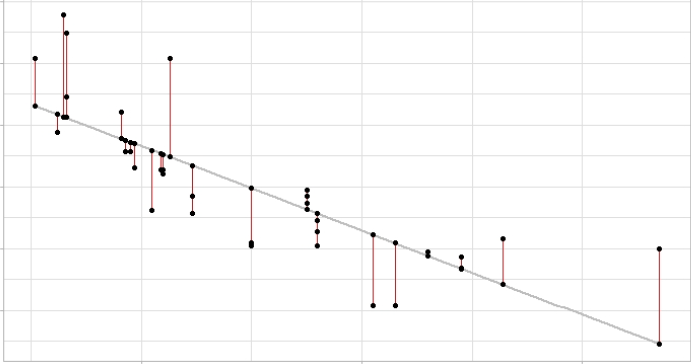

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro

In [2]:
hospitales = ["Clin1","Clin2","Clin3","Clin4","Clin5","Clin6","Clin7","Clin8","Clin9","Clin10","Clin11","Clin12",
          "Clin13","Clin14","Clin15","Clin16","Clin17","Clin18","Clin19","Clin20","Clin21","Clin22",
          "Clin23","Clin24","Clin25","Clin26","Clin27","Clin28","Clin29","Clin30"]
patologia = [1664,  1710, 1559, 1672, 1532, 1600, 1518, 1447, 1544, 1598,
          1589, 1436, 1549, 1612, 1513, 1514, 1500, 1509, 1421, 1515,
          1487, 1518, 1419, 1452, 1436, 1528, 1421, 1489, 1417, 1421]

sintoma = [305, 315, 280, 130, 262, 218, 363, 222, 235, 115, 200, 144, 154, 225,
        167, 213, 153, 204, 213, 242, 119, 125, 110, 145, 207, 146, 124, 70,
        93, 56]

data = pd.DataFrame({'hospitales': hospitales, 'patologia': patologia, 'sintoma': sintoma})
data.head(5)

,hospitales,patologia,sintoma
0,Clin1,1664,305
1,Clin2,1710,315
2,Clin3,1559,280
3,Clin4,1672,130
4,Clin5,1532,262


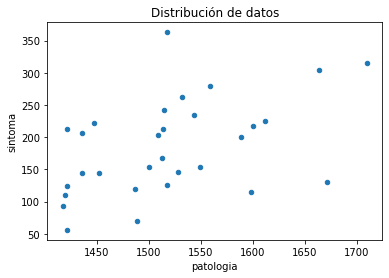

In [3]:
fig, ax = plt.subplots()

data.plot(x = 'patologia', y = 'sintoma', kind = "scatter", ax = ax)
ax.set_title('Distribución de datos');

## Bondad de ajuste

### Error estándar de los residuos (RSE)

Mide la desviación promedio de cualquier punto estimado por el modelo respecto de la recta de regresión. 

$$RSE = \sqrt(\frac{1}{n-p-1}*\sum(\hat{y_i}-y_i)^2)$$

### $R^2$

Describe la proporción de varianza de la variable respuesta explicada por el modelo y relativa a la varianza total. Su valor está acotado entre 0 y 1. Al ser adimensional, presenta la ventaja frente al RSE de ser más fácil de interpretar.

$$R^2 = 1- \frac{\sum(\hat{y_i}-y_i)^2}{\sum(y_i-\bar{y})^2}$$

### F-test

El modelo es capaz de predecir si al menos uno de los predictores que forman el modelo contribuye de forma significativa. Para realizar este contraste se compara la suma de residuos cuadrados del modelo de interés con la del modelo sin predictores, formado únicamente por la media. Por ejemplo, si el F-test es menor a p = 0.05, indica que sí hay evidencias de que la varianza que determinada por el modelo ya que es superior a la esperada por azar (varianza total).

### Predictores y valor p

Para cada uno de los coeficientes de la ecuación de regresión lineal se puede calcular su significancia (valor p) y su intervalo de confianza.

La hipótesis nula en este caso es:

El predictor  $x_i$  no contribuye al modelo ($\beta_i = 0$), en presencia del resto de predictores. En el caso de regresión lineal simple, se puede interpretar también como que no existe relación lineal entre ambas variables.

#### Estadístico t

$$t=\frac{\hat{\beta_j}}{\frac{\sigma^2}{\sum_{ij}(x_{ij}-\bar{x})^2}}$$

#### Valor p

$$p = P(|t|>valor\,t)$$

#### Intervalo de confianza

$$\beta_j \pm t^{a/2} \frac{\sigma^2}{\sum_{ij}(x_{ij}-\bar{x})^2}$$

In [4]:
corr = pearsonr(x = data['patologia'], y =  data['sintoma'])
corr
print("Coeficiente de correlación de Pearson: ", corr[0])
print("P-value: ", corr[1])

Coeficiente de correlación de Pearson:  0.4651243939226015
P-value:  0.009600527462307025


## Dataset de entrenamiento y testeo

In [5]:
X = data[['patologia']]
y = data['sintoma']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        shuffle      = True
                                    )


modelo = LinearRegression();
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), ))) #list convierte tupla en lista. flatten 'aplasta tensores en 1D'
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-456.74379266]
Coeficiente: [('patologia', 0.4275059020847576)]
Coeficiente de determinación R^2: 0.2050991310722824


/Users/alejandro/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [6]:
predic = modelo.predict(X = X_test)
print(predic[0:10,])

rms = mean_squared_error(
        y_true  = y_test,
        y_pred  = predic,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rms}")

[[157.15468274]
 [226.41063887]
 [205.46284967]
 [161.85724766]
 [179.81249555]
 [178.95748374]
 [150.74209421]
 [190.0726372 ]
 [192.21016671]]

El error (rmse) de test es: 90.17403782611258


In [7]:
# Ordinary Least Squares (OLS) necesita vector de 1 en el array para calcular regresion

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     9.651
Date:                Tue, 28 Feb 2023   Prob (F-statistic):            0.00581
Time:                        15:01:02   Log-Likelihood:                -112.41
No. Observations:                  21   AIC:                             228.8
Df Residuals:                      19   BIC:                             230.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -456.7438    210.885     -2.166      0.0

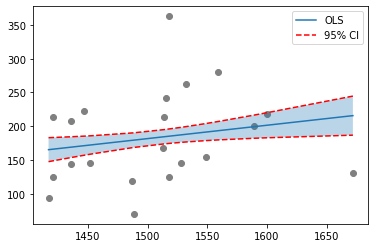

In [8]:
predics = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.5)
predics['x'] = X_train[:, 1]
predics['y'] = y_train
predics = predics.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots()

ax.scatter(predics['x'], predics['y'], marker='o', color = "gray")
ax.plot(predics['x'], predics["mean"], linestyle='-', label="OLS")
ax.plot(predics['x'], predics["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predics['x'], predics["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predics['x'], predics["mean_ci_lower"], predics["mean_ci_upper"], alpha=0.3)
ax.legend();

## Condiciones para realizar regresión lineal

1. **No colinealidad o multicolinealidad:** 
Los predictores deben ser independientes. No se puede identificar de forma precisa el efecto individual que tiene cada predictor sobre la respuesta: hay un incremento de la varianza de los coeficientes de regresión estimados hasta el punto de que resulta imposible establecer su significancia estadística.

Se necesita revisar: a) Valor $R^2$, b) matriz de correlación, hacer 'mini' regresiones lineales entre los predictores por pares, c) analizar el Factor de Inflación de la Varianza (VIF):
$$VIF = \frac{1}{1-R^2},$$
si VIF = 1: ausencia total de colinealidad, 1 < VIF < 5: la regresión puede verse afectada por cierta colinealidad, o 5 < VIF < 10: la regresión puede verse altamente afectada por cierta colinealidad.

d) Revisar homocedasticidad: Si la varianza es constante, se distribuyen de forma aleatoria manteniendo una misma dispersión entonces hay homocedasticidad.

## Caso: Regresión múltiple

In [9]:
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})

In [10]:
def analyze(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
analyze(corr_matrix).head(12)

,variable_1,variable_2,r,abs_r
3,tv,ventas,0.782224,0.782224
12,ventas,tv,0.782224,0.782224
7,radio,ventas,0.576223,0.576223
13,ventas,radio,0.576223,0.576223
6,radio,periodico,0.354104,0.354104
9,periodico,radio,0.354104,0.354104
11,periodico,ventas,0.228299,0.228299
14,ventas,periodico,0.228299,0.228299
2,tv,periodico,0.056648,0.056648
8,periodico,tv,0.056648,0.056648


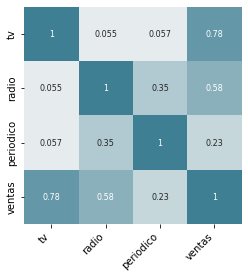

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

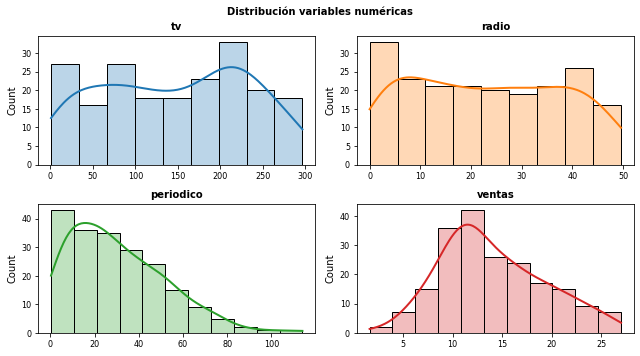

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [13]:
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        shuffle      = True
                                    )

In [14]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     435.7
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.57e-69
Time:                        19:48:14   Log-Likelihood:                -264.84
No. Observations:                 140   AIC:                             537.7
Df Residuals:                     136   BIC:                             549.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6931      0.355      7.577      0.0

In [15]:
X_train = X_train.drop(columns = 'periodico')
X_test  = X_test.drop(columns = 'periodico')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     653.9
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           8.26e-71
Time:                        19:48:14   Log-Likelihood:                -265.27
No. Observations:                 140   AIC:                             536.5
Df Residuals:                     137   BIC:                             545.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7794      0.343      8.114      0.0

In [16]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

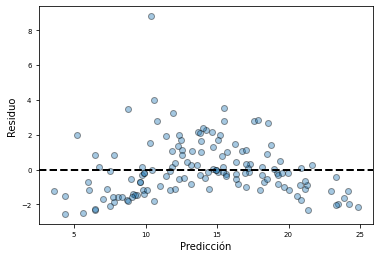

In [17]:
plt.scatter(prediccion_train, residuos_train,edgecolors=(0, 0, 0), alpha = 0.4)
plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
plt.xlabel('Predicción')
plt.ylabel('Residuo')
plt.tick_params(labelsize = 7)

## Test de normalidad (Shapiro)

Se comprueba si los residuos siguen una distribución normal empleando Shapiro-Wilk test. (K-cuadrado es el test por default como Omnibus).

La hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el valor p no es inferior al nivel de referencia seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal

In [18]:
shapiro_test = shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9062846899032593, pvalue=7.068035756674362e-08)